In [20]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile 
import numpy as np 

from IPython.display import display 

data = pd.read_excel('Clean_PA_Data_trunk.xlsx', sheetname ='Sheet1')

data2 = pd.read_excel('Clean_PA_Data.xlsx', sheetname = 'Sheet1')

print(data.shape[0])

print(data2.shape[0])



99
30309


In [53]:
#seperate enrollments and non enrollments | drop uneeded column 

enrollments = data[data.Label == 1]
enrollments = enrollments.drop('Usage Period 1', axis = 1)

nonenrollments = data2[data2.Label == 0]
nonenrollments = nonenrollments.drop('Usage Period 1', axis = 1)

print(nonenrollments.shape[0])
print(enrollments.shape[0])



30282
27


In [61]:
# Take # of samples of non-enrollment data set and add it to enrollment data
from sklearn.preprocessing import MinMaxScaler

def takeSample (success , failure):
    # create twenty combined data sets and fit to data 
    for x in range(1):
        failure = failure.sample( 54, replace = False )
        
        #print(failure.shape[0])
        #print(success.shape[0])
        
        combined = pd.concat([failure, success])
        
        X = combined.drop('Label', axis = 1)
        y = combined['Label']
        
        names = X.head(n=1)

        names = list(names)
    
        print("sample size:",combined.shape[0]) 
        
        # normalize data 
        scaler = MinMaxScaler()
        
        X = scaler.fit_transform(X)
       
        X = pd.DataFrame(data = X, columns = names)
        
    return X, y



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score, recall_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
 

def runModel(number):
    
    features = np.zeros(15)
    
    for x in range(number):
        
        X, y = takeSample(enrollments, nonenrollments)
        
        #Split Data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.5, random_state = 0)

        #print("train size:", X_train.shape[0])
        #print("test size", X_test.shape[0])
        
        #evluation parameters 
        beta = .6 
        parameters = {'n_estimators' : [1,4,8,16,32,64]}
        score = make_scorer(recall_score)
        
        model = AdaBoostClassifier(random_state =0)
        
        grid_obj = GridSearchCV(model, parameters, scoring = score)
        
        model_fit = grid_obj.fit(X_train, y_train)
        
        best_model = model_fit.best_estimator_
        
        importances = best_model.feature_importances_ 
        
        best_model_predictions = best_model.predict(X_test)
        
        best_recall_score = recall_score(y_test, best_model_predictions, beta)
        
        importances = best_model.feature_importances_ 
        
        print("recall score:", best_recall_score)
        
        #print(importances)
        
        features = np.add(features, importances)   
    
    #print(X_train.columns)
    
    return features, X_train  
        
        #fbest_test_score = fbeta_score(y_test, best_predictions_test, beta)

        #acc_test_score = accuracy_score(y_test, best_predictions_test, beta)         


In [50]:
import matplotlib.pyplot as pl

def feature_plot(importances, X_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Create the plot
    fig = pl.figure(figsize = (25,10))
    pl.title("Normalized Weights of Most Predictive Features", fontsize = 26)
    pl.bar(np.arange(10), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.4, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(10), columns, fontsize = 20)
    pl.xlim((-0.5, 6.5))
    pl.ylabel("Weight", fontsize = 20)
    pl.xlabel("Feature", fontsize = 20)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

sample size: 81
recall score: 0.266666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.266666666667
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.0666666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.266666666667
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.6
sample size: 81
recall score: 0.666666666667
sample size: 81
recall score: 0.266666666667
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.0666666666667
sample size: 81
recall score: 0.66666666

recall score: 0.266666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.133333333333
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.733333333333
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.733333333333
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.133333333333
sample size: 81
recall score: 0.733333333333
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.4
sample size: 81
recall score: 0.0666666666667
sample size: 81
recall score: 0.0666666666667


recall score: 0.4
sample size: 81
recall score: 0.133333333333
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.266666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.666666666667
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.2
sample size: 81
recall score: 0.266666666667
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.133333333333
sample size: 81
recall score: 0.0
sample size: 81
recall score: 0.733333333333
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.466666666667
sample size: 81
recall score: 0.266666666667
sample size: 81
recall score: 0.533333333333
sample size: 81
recall score: 0.0666666666667
sample size: 81
recall score: 0.0
sample size: 81
recall score: 0.333333333333
sample size: 81
recall score: 0.333333333333
sample size: 81
recall s

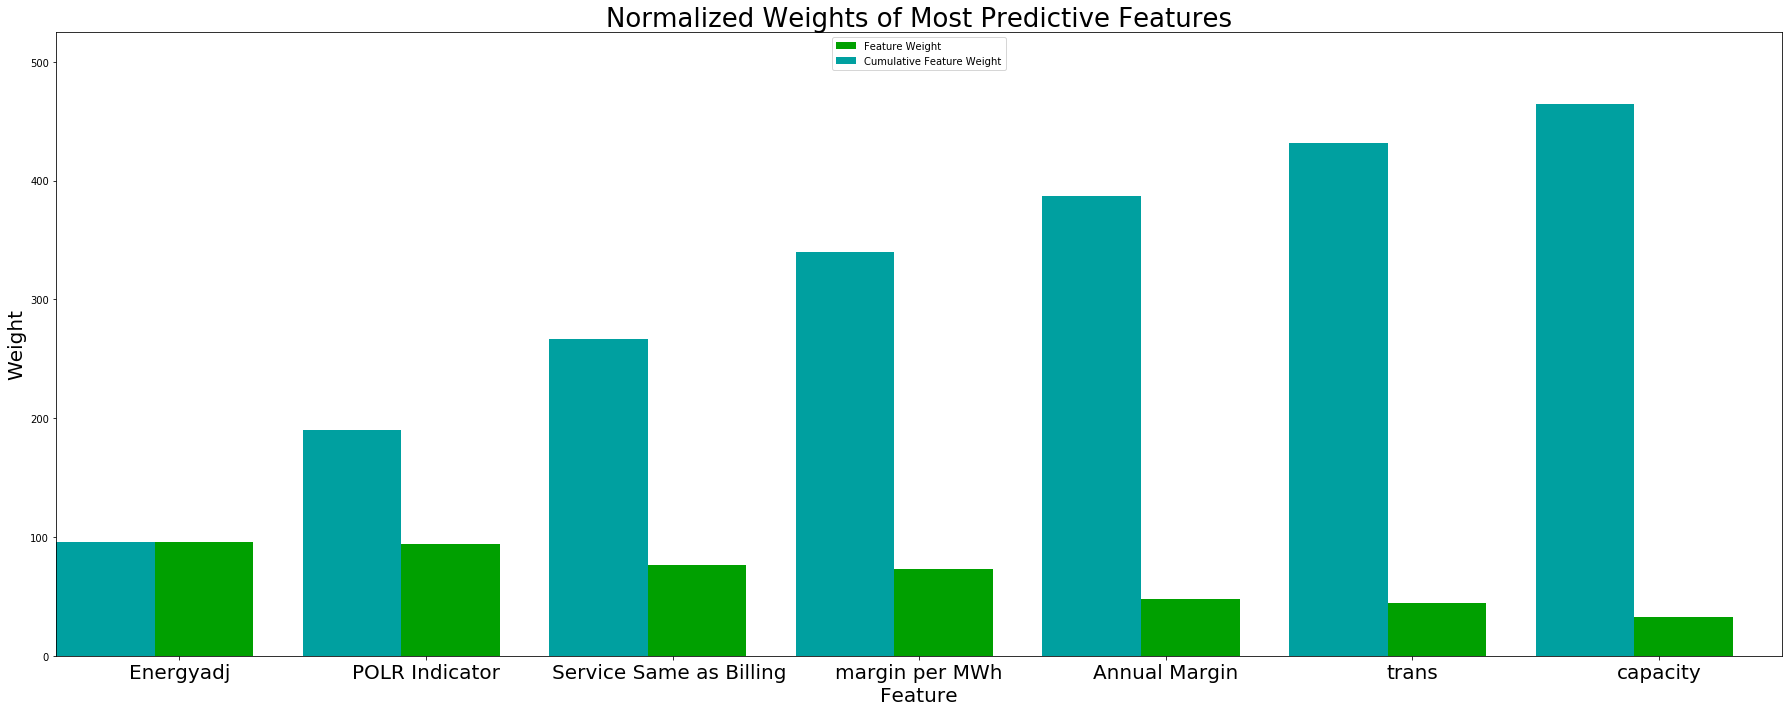

In [62]:

A, B = runModel(500)

feature_plot(A,B)